# CO2 Decision Trees (CART) and Information Gain 
## Prepared by: Rob Eugene A. Dequiñon and John Kenneth P. Alon

<b> Problem: </b> Heart disease remains a significant health concern in the Philippines. Early identification of individuals at risk of heart attack can enable timely interventions and lifestyle changes, potentially saving lives. Your task is to build a machine learning model to predict heart attack risk based on several health indicators.



<b> Objectives: </b>

This activity aims to deepen your understanding of the Support Vector Machine (SVM) classification algorithm in a more practical context. You will:

Explore a dataset representing health indicators for individuals and their heart attack risk, understanding its characteristics and the classification challenge.
Implement SVM models using Python's scikit-learn library to predict whether an individual is at 'High Risk' or 'Low Risk' of a heart attack.
Explore different SVM kernel types (Linear, RBF, Polynomial) and adjust their hyperparameters (like C, gamma, and degree) to understand their impact on model performance and decision boundaries.
Evaluate the model's performance using key metrics (accuracy, precision, and recall) to understand its effectiveness in this critical classification task.
Visualize the model's decision boundary (for selected features) to gain intuitive insight into how SVMs make classifications based on health attributes.
Discuss your findings, draw conclusions, and propose recommendations addressing the specific problems and objectives outlined below.


In [66]:
# 🧩 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA



# 📂 Load dataset
df = pd.read_csv("heart_attack_risk_data_ph.csv")
df.head()


,Age,Cholesterol,SystolicBP,BMI,ExerciseHours,Smoking,Diabetes,HeartAttackRisk
0,52,241.980663,109.872326,18.000000,2.273013,0,0,0
1,42,227.739010,117.832220,20.698075,3.937593,0,0,0
2,54,201.788911,108.113701,22.931972,4.036034,0,0,0
3,67,180.591897,115.380577,34.438438,4.945261,0,0,0
4,41,220.946699,91.595780,27.782766,1.266283,0,1,1


In [67]:
# 🎯 Features and Target
X = df.drop("HeartAttackRisk", axis=1)
y = df["HeartAttackRisk"]

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [69]:
# =========================================
# 🔧 RBF SVM
# =========================================
rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

param_grid_rbf = {
    'svm__C': np.arange(0.1, 5, 0.1),
    'svm__gamma': np.arange(0.01, 5, 0.1)
}

grid_rbf = GridSearchCV(rbf_pipeline, param_grid_rbf, cv=5, scoring='accuracy')
grid_rbf.fit(X_train, y_train)

print("🔍 Best RBF Parameters:", grid_rbf.best_params_)
print("📈 Best RBF Cross-Validated Accuracy:", grid_rbf.best_score_)


🔍 Best RBF Parameters: {'svm__C': np.float64(2.8000000000000003), 'svm__gamma': np.float64(0.11)}
📈 Best RBF Cross-Validated Accuracy: 0.9125



📊 RBF Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.68      0.68      0.68        31

    accuracy                           0.90       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.90      0.90      0.90       200



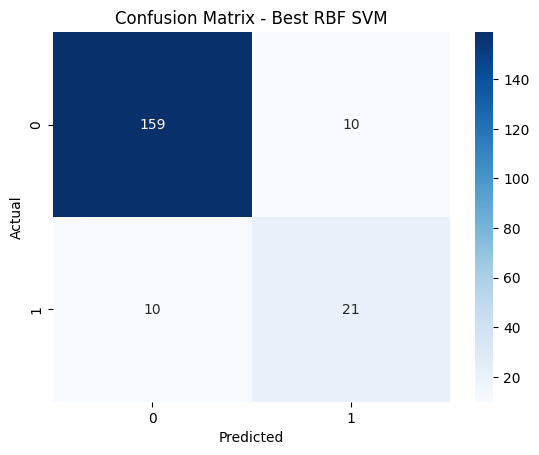

In [ ]:
# ✅ Evaluate best RBF model on test set
best_rbf = grid_rbf.best_estimator_
y_pred_rbf = best_rbf.predict(X_test)

print("\n📊 RBF Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# 🔍 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# =========================================
# 🔧 Polynomial SVM
# =========================================
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly'))
])

param_grid_poly = {
    'svm__C': np.arange(0.1, 5, 0.1),
    'svm__degree': np.arange(1, 50, 1)
}

grid_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring='accuracy')
grid_poly.fit(X_train, y_train)

print("🔍 Best Polynomial Parameters:", grid_poly.best_params_)
print("📈 Best Polynomial Cross-Validated Accuracy:", grid_poly.best_score_)


🔍 Best Polynomial Parameters: {'svm__C': np.float64(0.30000000000000004), 'svm__degree': np.int64(4)}
📈 Best Polynomial Cross-Validated Accuracy: 0.9125



📊 Polynomial Classification Report:


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.67      0.65      0.66        31

    accuracy                           0.90       200
   macro avg       0.80      0.79      0.80       200
weighted avg       0.89      0.90      0.89       200



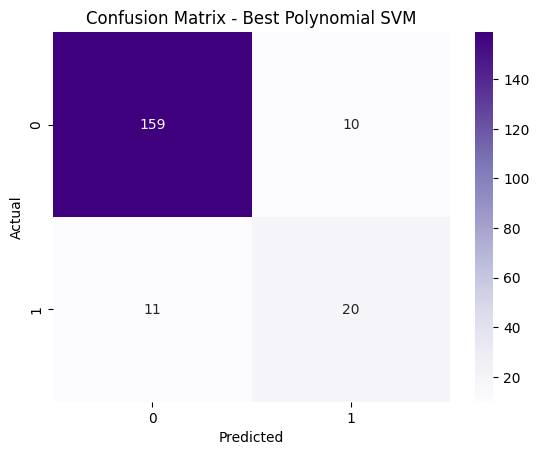

In [ ]:
# ✅ Evaluate best Polynomial model on test set
best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test)

print("\n📊 Polynomial Classification Report:")
print(classification_report(y_test, y_pred_poly))

# 🔍 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Best Polynomial SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# =========================================
# 🔧 Linear SVM: Hyperparameter Tuning
# =========================================
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

param_grid_linear = {
    'svm__C': np.arange(1, 50, 1)
}

grid_linear = GridSearchCV(linear_pipeline, param_grid_linear, cv=5, scoring='accuracy')
grid_linear.fit(X_train, y_train)

print("🔍 Best Linear SVM Parameters:", grid_linear.best_params_)
print("📈 Best Linear SVM Cross-Validated Accuracy:", grid_linear.best_score_)


🔍 Best Linear SVM Parameters: {'svm__C': np.int64(1)}
📈 Best Linear SVM Cross-Validated Accuracy: 0.9112499999999999



📊 Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.68      0.68      0.68        31

    accuracy                           0.90       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.90      0.90      0.90       200



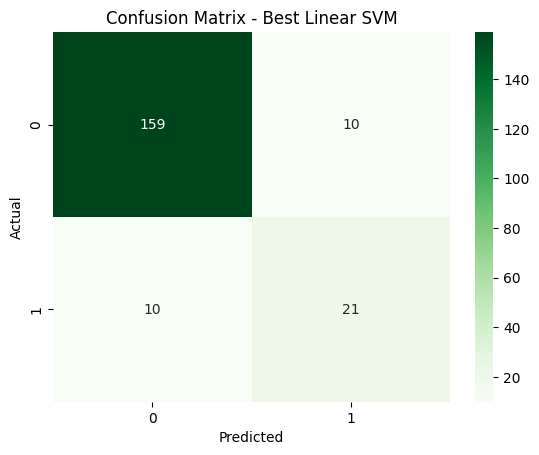

In [ ]:
# ✅ Evaluate best Linear SVM model on test set
best_linear = grid_linear.best_estimator_
y_pred_linear = best_linear.predict(X_test)

print("\n📊 Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))

# 🔍 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Best Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Visualization Using PCA


In [70]:
# Fit PCA on scaled full dataset (important: scale before PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Save reduced dataset for visualization
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca_df["HeartAttackRisk"] = y.values

In [71]:
# Redefine features and target from PCA output
X_vis = X_pca_df[["PC1", "PC2"]]
y_vis = X_pca_df["HeartAttackRisk"]

# Split PCA-reduced data (same test split for consistency)
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

# Train all three best models (Linear, RBF, Polynomial) on PCA data
linear_pca = SVC(kernel='linear', C=grid_linear.best_params_['svm__C']).fit(X_vis_train, y_vis_train)
rbf_pca = SVC(kernel='rbf', C=grid_rbf.best_params_['svm__C'], gamma=grid_rbf.best_params_['svm__gamma']).fit(X_vis_train, y_vis_train)
poly_pca = SVC(kernel='poly', C=grid_poly.best_params_['svm__C'], degree=grid_poly.best_params_['svm__degree']).fit(X_vis_train, y_vis_train)


In [72]:
# Function to plot decision boundary of a 2D SVM
def plot_svm_boundary(model, X, y, title, cmap=plt.cm.coolwarm):
    h = 0.02  # step size in mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.6)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette="Set1", edgecolor='k')
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="HeartAttackRisk")
    plt.show()


c:\Users\Eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


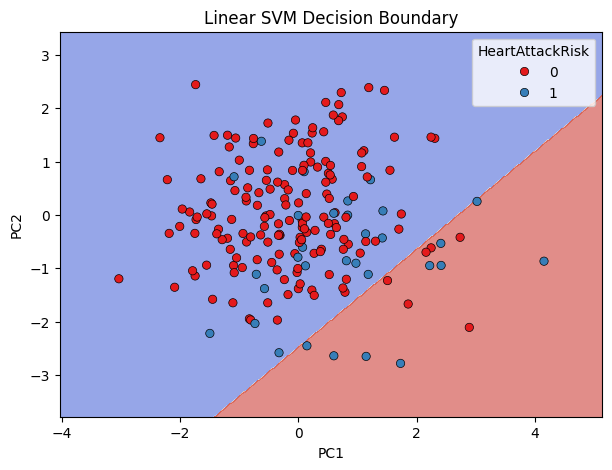

In [73]:
# Visualize decision boundary for Linear SVM
plot_svm_boundary(linear_pca, X_vis_test, y_vis_test, "Linear SVM Decision Boundary")

In [ ]:
# Visualize decision boundary for RBF SVM
plot_svm_boundary(rbf_pca, X_vis_test, y_vis_test, "RBF SVM Decision Boundary")

c:\Users\Eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Visualize decision boundary for Polynomial SVM
plot_svm_boundary(poly_pca, X_vis_test, y_vis_test, "Polynomial SVM Decision Boundary")